In [241]:
import os
import re
import pandas as pd
file_list = ["/Users/Austin/Desktop/data/uv_vis/OFPs1.Sample.Cycle.Raw.csv",
             "/Users/Austin/Desktop/data/uv_vis/OFPs2.Sample.Cycle.Raw.csv",
             "/Users/Austin/Desktop/data/uv_vis/OFPs3.Sample.Cycle.Raw.csv", 
             "/Users/Austin/Desktop/data/uv_vis/OFPs4.Sample.Cycle.Raw.csv"]
df1 = pd.read_csv("/Users/Austin/Desktop/data/uv_vis/Sample 1W.csv", header=1, names=['nm','A1'])
df2 = pd.read_csv("/Users/Austin/Desktop/data/uv_vis/Sample 2W.csv", header=1, names=['nm','A2'])
df3 = pd.read_csv("/Users/Austin/Desktop/data/uv_vis/Sample 3W.csv", header=1, names=['nm','A3'])
df4 = pd.read_csv("/Users/Austin/Desktop/data/uv_vis/Sample 4W.csv", header=1, names=['nm','A4'])
df5 = pd.read_csv("/Users/Austin/Desktop/data/uv_vis/Sample 5W.csv", header=1, names=['nm','A5'])

def create_series(first_df, L):
    l = len(L)
    s = pd.concat([first_df]+[df[f'A{index+2}'] for index, df in enumerate(L)], axis=1)
    return s
new_series = create_series(df1,[df2,df3,df4,df5])
# new = pd.merge(df1,df2,on='nm',suffixes=('_1', '_2'))
# new2= pd.merge(df3,df4,on='nm',suffixes=('_3','_4'))
# final = pd.merge(new,new2,on='nm')
# final.head()
new_series.head()
# df = pd.DataFrame(new_series, keys=['nm','A1','A2','A3','A4'])
# df1.head()


,nm,A1,A2,A3,A4,A5
0,450.0,-0.0046,0.0000,-0.0051,-0.0017,-0.0055
1,449.3,-0.0045,0.0001,-0.0051,-0.0017,-0.0055
2,448.5,-0.0044,0.0002,-0.0051,-0.0017,-0.0054
3,447.8,-0.0046,0.0000,-0.0053,-0.0018,-0.0056
4,447.0,-0.0045,0.0002,-0.0051,-0.0017,-0.0055


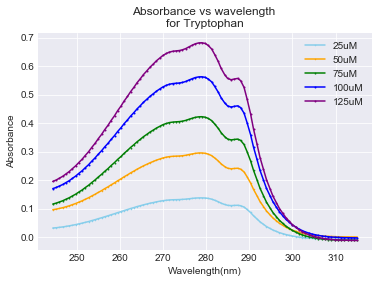

In [242]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# df = df1+pd.read_csv("/Users/Austin/Desktop/data/uv_vis/OFPs2.Sample.Cycle.Raw.csv")
# print(len(df['nm']))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
# def plotter(x, y_list, x_label, y_label,series_labels):
# #     # Initialize the figure
#     plt.style.use('seaborn-darkgrid')
# #     # create a color palette
#     palette = plt.get_cmap('Set1')
#     colors = ['skyblue','orange','green','blue', 'purple']
#     for index, value in enumerate(y_list):
#         plt.plot(x, value, color=f'{colors[index]}', label=f'{series_labels[index]}uM')
#     plt.xlabel(f'{x_label}')
#     plt.ylabel(f'{y_label}')
#     plt.title(f'{title1}')
        
x=df1['nm'][180:275]
y=df1['A1'][180:275]
y2=df2['A2'][180:275]
y3=df3['A3'][180:275]
y4=df4['A4'][180:275]
y5=df5['A5'][180:275]

plt.plot(x, y, marker='*', markerfacecolor='blue', color='skyblue', markersize=1, label='25uM')
plt.plot(x, y2, marker='.', markerfacecolor='blue', color='orange', markersize=1, label='50uM')
plt.plot(x, y3, marker='^', markerfacecolor='blue', color='green', markersize=1, label='75uM')
plt.plot(x, y4, marker='o', markerfacecolor='blue', color='blue', markersize=1, label='100uM')
plt.plot(x, y5, marker='o', markerfacecolor='blue', color='purple', markersize=1, label='125uM')
x_label1, y_label1, title1 = 'Wavelength(nm)', 'Absorbance', 'Absorbance vs wavelength \nfor Tryptophan'
plt.xlabel(f'{x_label1}')
plt.ylabel(f'{y_label1}')
plt.title(f'{title1}')
plt.legend()
plt.show()

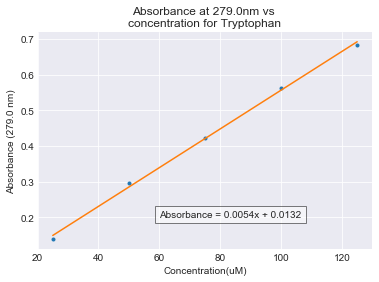

In [243]:
from scipy import stats
plt.close('all')


A = new_series.set_index('nm')
B = A.iloc[180:280,:]
Max = B.idxmax()

lambda_max = [Max[i] for i, _ in enumerate(Max)]
c_list = [25,50,75,100,125]
abs_list = []
for index, item in enumerate(lambda_max):
    abs_list.append(B[f'A{index+1}'][item])
slope, intercept, r_value, p_value, std_err = stats.linregress(c_list,abs_list)
line = slope*array(c_list)+intercept
# # a = ns.max()
plt.plot(c_list,abs_list,'.',c_list,line)
x_label2, y_label2, title2 = 'Concentration(uM)', f'Absorbance ({lambda_max[0]} nm)', f'Absorbance at {lambda_max[0]}nm vs \nconcentration for Tryptophan'
plt.xlabel(f'{x_label2}')
plt.ylabel(f'{y_label2}')
plt.title(f'{title2}')
plt.text(60,0.2,f'Absorbance = {round(slope,4)}x + {round(intercept,4)}',bbox=dict(facecolor='white', alpha=0.5))
plt.show()

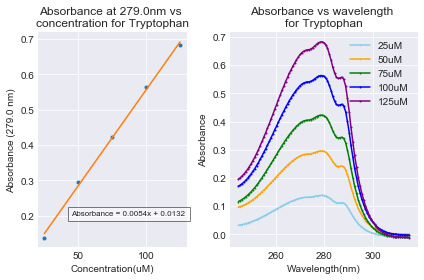

In [244]:
fig = plt.figure()
# f, s, row, col = (1,5),(0,0),1,2 
# f1, s1, row1, col1 = (1,5),(0,2),1,3 
ax1 = plt.subplot2grid((1,11),(0,0), rowspan=1, colspan=5)
# ax1 = plt.subplot2grid(f, s, rowspan=row, colspan=col)
# plt.subplot(2,1,1)
ax1.plot(c_list,abs_list,'.',c_list,line)
plt.title(f'{title2}')
plt.xlabel(f'{x_label2}')
plt.ylabel(f'{y_label2}')
plt.text(45,0.2,f'Absorbance = {round(slope,4)}x + {round(intercept,4)}',size=8,bbox=dict(facecolor='white', alpha=0.5))
# plt.subplot(2, 1, 2)
ax2 = plt.subplot2grid((1,11),(0,5), rowspan=1, colspan=6)
# ax2 = plt.subplot2grid(f1, s1, rowspan=row1, colspan=col1)
ax2.plot(x, y, marker='*', markerfacecolor='blue', color='skyblue', markersize=1, label='25uM')
ax2.plot(x, y2, marker='.', markerfacecolor='blue', color='orange', markersize=1, label='50uM')
ax2.plot(x, y3, marker='^', markerfacecolor='blue', color='green', markersize=1, label='75uM')
ax2.plot(x, y4, marker='o', markerfacecolor='blue', color='blue', markersize=1, label='100uM')
ax2.plot(x, y5, marker='o', markerfacecolor='blue', color='purple', markersize=1, label='125uM')
plt.xlabel(f'{x_label1}')
plt.ylabel(f'{y_label1}')
plt.title(f'{title1}')
plt.legend()
plt.tight_layout()
plt.show()

In [240]:
# class FileHandler:
    
#     def __init__(self, folder_path, spec_type, c_list, baseline=None):
#         """
#         folder_path:  path to folder containing csv files
#         spec_type: either 'CPS' or 'A' to indicate Fluoresence or Absorbtion file, respectively
#         baseline: a file path to the 0% baseline used for blank subtraction
#         """
#         self.path = folder_path
#         self.file_list = os.listdir(f'{folder_path}/')
#         self.spec_type = spec_type
#         self.c_list = c_list
#         self.baseline = baseline
#         self.index_list = self.index_finder()
# #         self.df_series = self.combine() 
#         self.combine()
    
#     def index_finder(self):
#         index_order = []
#         for s in sorted(self.c_list):
#             for i, name in enumerate(self.file_list):
#                 L = re.sub("\D", "", name)
#                 if f'{s}' == L:
#                     index_order.append(i)
#                 else:
#                     continue
#         print(f'from index_finder:{index_order}')
#         return index_order
    
#     def combine(self):
#         df_list = []
#         for index, file_index in enumerate(self.index_list):
#             print(index,file_index)
#             if index == 0:
#                 df_list.append(pd.read_csv(f'{self.path}/{self.file_list[file_index]}', header=1, names=['nm',f'{self.spec_type}{c_list[index]}']))
#             else:
#                 df_list.append(pd.read_csv(f'{self.path}/{self.file_list[file_index]}', header=1, names=['nm',f'{self.spec_type}{c_list[index]}']))
#         return FileHandler.create_series(df_list[0],df_list[1:])
                               
                               
#     @staticmethod    
#     def create_series(first_df, L):
#         l = len(L)
#         s = pd.concat([first_df]+[df[f'A{index+2}'] for index, df in enumerate(L)], axis=1)
#         return s
                    
# A = FileHandler('/Users/Austin/Desktop/data/uv_vis', 'A', [1,2,3,4,5])

1